<a href="https://colab.research.google.com/github/antunes-emanuel/python/blob/master/Notebook_de_Leituras_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O propósito deste notebook é realizar uma análise a partir dos dados dos meus livros lidos, os quais passei a registrar em 2016. A base de dados é importada diretamente do site do Goodreads.

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Leitura/goodreads_library_export.csv')
df.head(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,27230361,Sapiens: Uma breve história da humanidade,Yuval Noah Harari,"Harari, Yuval Noah",Janaína Marcoantonio,"=""8525432407""","=""9788525432407""",5,4.43,L&PM Editores,Kindle Edition,531.0,2015.0,2011.0,2020/01/04,2020/01/07,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,25070873,How to Perform Under Pressure: The Science of ...,Hendrie Weisinger,"Weisinger, Hendrie",J.P. Pawliw-Fry,"=""""","=""""",5,4.07,John Murray,Kindle Edition,321.0,2015.0,2015.0,2020/01/29,2020/06/10,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,37585151,O poder dos quietos: Como os tímidos e introve...,Susan Cain,"Cain, Susan","Max Gehringer, Ana Carolina Bento Ribeiro","=""""","=""""",5,4.06,HarperCollins Brasil,Kindle Edition,344.0,2016.0,2012.0,2020/01/19,2020/01/12,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,18337587,O Andar do Bêbado,Leonard Mlodinow,"Mlodinow, Leonard",NaN,"=""""","=""""",5,3.92,Zahar,Kindle Edition,264.0,2012.0,2008.0,NaN,2020/02/13,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,18518161,Clube da luta,Chuck Palahniuk,"Palahniuk, Chuck",NaN,"=""""","=""""",4,4.19,Leya,Kindle Edition,221.0,2014.0,1996.0,2020/02/16,2020/02/13,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


O arquivo original traz várias colunas as quais não trazem informações as quais eu preencha no Goodreads ou que eu ache interessante para análise. Assim, removo estas colunas.

In [3]:
df = df.drop(columns=['Bookshelves', 'Bookshelves with positions','My Review', 'Spoiler', 'Private Notes', 
                      'Recommended For', 'Recommended By', 'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
                      'Condition', 'Condition Description', 'BCID'])
df.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,Read Count
0,27230361,Sapiens: Uma breve história da humanidade,Yuval Noah Harari,"Harari, Yuval Noah",Janaína Marcoantonio,"=""8525432407""","=""9788525432407""",5,4.43,L&PM Editores,Kindle Edition,531.0,2015.0,2011.0,2020/01/04,2020/01/07,read,1
1,25070873,How to Perform Under Pressure: The Science of ...,Hendrie Weisinger,"Weisinger, Hendrie",J.P. Pawliw-Fry,"=""""","=""""",5,4.07,John Murray,Kindle Edition,321.0,2015.0,2015.0,2020/01/29,2020/06/10,read,1
2,37585151,O poder dos quietos: Como os tímidos e introve...,Susan Cain,"Cain, Susan","Max Gehringer, Ana Carolina Bento Ribeiro","=""""","=""""",5,4.06,HarperCollins Brasil,Kindle Edition,344.0,2016.0,2012.0,2020/01/19,2020/01/12,read,1
3,18337587,O Andar do Bêbado,Leonard Mlodinow,"Mlodinow, Leonard",NaN,"=""""","=""""",5,3.92,Zahar,Kindle Edition,264.0,2012.0,2008.0,NaN,2020/02/13,read,1
4,18518161,Clube da luta,Chuck Palahniuk,"Palahniuk, Chuck",NaN,"=""""","=""""",4,4.19,Leya,Kindle Edition,221.0,2014.0,1996.0,2020/02/16,2020/02/13,read,1


In [4]:
df['Exclusive Shelf'].value_counts().to_dict()

{'currently-reading': 3, 'read': 95, 'to-read': 60}

In [5]:
livros_lidos = df.loc[df['Exclusive Shelf'] == 'read']
livros_lidos.head()


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,Read Count
0,27230361,Sapiens: Uma breve história da humanidade,Yuval Noah Harari,"Harari, Yuval Noah",Janaína Marcoantonio,"=""8525432407""","=""9788525432407""",5,4.43,L&PM Editores,Kindle Edition,531.0,2015.0,2011.0,2020/01/04,2020/01/07,read,1
1,25070873,How to Perform Under Pressure: The Science of ...,Hendrie Weisinger,"Weisinger, Hendrie",J.P. Pawliw-Fry,"=""""","=""""",5,4.07,John Murray,Kindle Edition,321.0,2015.0,2015.0,2020/01/29,2020/06/10,read,1
2,37585151,O poder dos quietos: Como os tímidos e introve...,Susan Cain,"Cain, Susan","Max Gehringer, Ana Carolina Bento Ribeiro","=""""","=""""",5,4.06,HarperCollins Brasil,Kindle Edition,344.0,2016.0,2012.0,2020/01/19,2020/01/12,read,1
3,18337587,O Andar do Bêbado,Leonard Mlodinow,"Mlodinow, Leonard",NaN,"=""""","=""""",5,3.92,Zahar,Kindle Edition,264.0,2012.0,2008.0,NaN,2020/02/13,read,1
4,18518161,Clube da luta,Chuck Palahniuk,"Palahniuk, Chuck",NaN,"=""""","=""""",4,4.19,Leya,Kindle Edition,221.0,2014.0,1996.0,2020/02/16,2020/02/13,read,1


In [6]:
livros_lidos['Binding'].value_counts().to_dict()

{'Capa comum': 2,
 'Hardcover': 11,
 'Kindle Edition': 40,
 'Paperback': 31,
 'eBook Kindle': 6,
 'ebook': 4,
 'kindle_edition': 1}

In [7]:
livros_lidos.replace(to_replace=['eBook Kindle','ebook', 'kindle_edition'], value='Kindle Edition', inplace=True)
livros_lidos.replace(to_replace='Capa comum', value='Paperback', inplace=True)
livros_lidos

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,Read Count
0,27230361,Sapiens: Uma breve história da humanidade,Yuval Noah Harari,"Harari, Yuval Noah",Janaína Marcoantonio,"=""8525432407""","=""9788525432407""",5,4.43,L&PM Editores,Kindle Edition,531.0,2015.0,2011.0,2020/01/04,2020/01/07,read,1
1,25070873,How to Perform Under Pressure: The Science of ...,Hendrie Weisinger,"Weisinger, Hendrie",J.P. Pawliw-Fry,"=""""","=""""",5,4.07,John Murray,Kindle Edition,321.0,2015.0,2015.0,2020/01/29,2020/06/10,read,1
2,37585151,O poder dos quietos: Como os tímidos e introve...,Susan Cain,"Cain, Susan","Max Gehringer, Ana Carolina Bento Ribeiro","=""""","=""""",5,4.06,HarperCollins Brasil,Kindle Edition,344.0,2016.0,2012.0,2020/01/19,2020/01/12,read,1
3,18337587,O Andar do Bêbado,Leonard Mlodinow,"Mlodinow, Leonard",NaN,"=""""","=""""",5,3.92,Zahar,Kindle Edition,264.0,2012.0,2008.0,NaN,2020/02/13,read,1
4,18518161,Clube da luta,Chuck Palahniuk,"Palahniuk, Chuck",NaN,"=""""","=""""",4,4.19,Leya,Kindle Edition,221.0,2014.0,1996.0,2020/02/16,2020/02/13,read,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22498910,A loja de tudo,Brad Stone,"Stone, Brad",NaN,"=""""","=""""",5,4.15,Intrínseca,Kindle Edition,390.0,2014.0,2013.0,2017/12/01,2020/02/16,read,1
154,31574783,O Obstáculo é o Caminho,Ryan Holiday,"Holiday, Ryan",Talita M. Rodrigues,"=""""","=""9788568696118""",4,4.15,Bicicleta Amarela,Kindle Edition,187.0,2015.0,2014.0,2020/03/28,2020/03/07,read,1
155,45485241,Gatilhos mentais: O guia completo com estratég...,Gustavo Ferreira,"Ferreira, Gustavo",NaN,"=""""","=""""",4,4.00,DVS Editora,Kindle Edition,147.0,2019.0,NaN,NaN,2020/03/06,read,1
156,50870234,A Metamorfose: Texto integral (Clássicos Melho...,Franz Kafka,"Kafka, Franz","Kris Barz, Claudia Abeling","=""""","=""9788506075241""",4,3.98,Editora Melhoramentos,Kindle Edition,98.0,2014.0,NaN,NaN,2020/02/04,read,1


In [8]:
livros_lidos['Binding'].value_counts().to_dict()

{'Hardcover': 11, 'Kindle Edition': 51, 'Paperback': 33}

In [9]:
livros_lidos.groupby('Binding')['My Rating'].mean()

Binding
Hardcover         4.454545
Kindle Edition    4.313725
Paperback         4.636364
Name: My Rating, dtype: float64

# Autores mais lidos

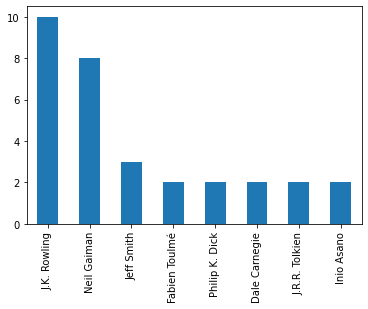

In [10]:
livros_lidos['Author'].value_counts().head(8).plot.bar()

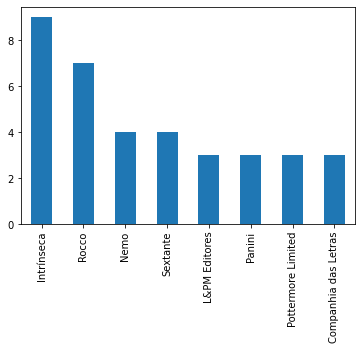

In [11]:
livros_lidos['Publisher'].value_counts().head(8).plot.bar()